In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


No. of Benign: 357
No. of Malignant: 212


C:\Users\Raghu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


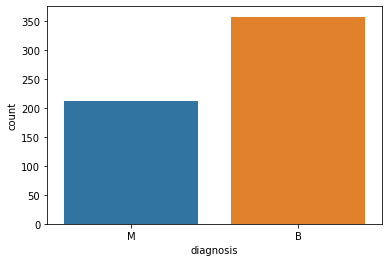

In [4]:
sns.countplot(data.diagnosis)
B,M=data.diagnosis.value_counts()
print("No. of Benign:", B)
print("No. of Malignant:", M)

We split into train test, then up-sample train

In [5]:
# separating target feature "diagnosis"
y=data.diagnosis
# drop redundant features
drop_cols=['Unnamed: 32','id', 'diagnosis']
x=data.drop(drop_cols,axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )      
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [9]:
y_train

149    B
124    B
421    B
195    B
545    B
      ..
71     B
106    B
270    B
435    M
102    B
Name: diagnosis, Length: 398, dtype: object

In [10]:
df=pd.concat([x_train,y_train],axis=1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
149,17.91,585.0,0.07944,0.02881,0.1473,0.05580,0.7574,21.47,0.002838,0.01780,0.01329,0.001976,0.09711,0.1564,0.2350,0.07014,B
124,16.39,553.5,0.07115,0.08092,0.1422,0.05823,1.1400,14.66,0.005919,0.04957,0.01208,0.004076,0.10250,0.3308,0.2048,0.07628,B
421,13.98,656.1,0.10310,0.14500,0.2086,0.07406,1.5110,49.45,0.009976,0.05278,0.02653,0.005444,0.13120,0.3219,0.2827,0.09208,B
195,16.33,516.4,0.07941,0.03873,0.1829,0.05667,0.9086,15.75,0.005298,0.02321,0.01853,0.002152,0.10970,0.1764,0.3024,0.06949,B
545,23.23,573.2,0.09246,0.02974,0.1664,0.05801,1.3360,31.24,0.005868,0.02021,0.02087,0.002583,0.12160,0.1049,0.2642,0.06953,B


In [11]:
from sklearn.utils import resample,shuffle

In [12]:
#set the minority class to a seperate dataframe
df_lowcls = df[df['diagnosis'] == "M"]
#set other classes to another dataframe
df_othercls = df[df['diagnosis'] == "B"]  

#upsample the minority class
df_1_upsampled = resample(df_lowcls,random_state=42,n_samples=250,replace=True)

#concatenate the upsampled dataframe
df_upsampled = pd.concat([df_1_upsampled,df_othercls])
df_upsampled

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
134,21.91,1075.0,0.09430,0.11530,0.1692,0.05727,1.2020,68.35,0.006001,0.028550,0.01492,0.002205,0.14650,0.39650,0.3109,0.07610,M
4,14.34,1297.0,0.10030,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.056880,0.01756,0.005115,0.13740,0.40000,0.2364,0.07678,M
24,21.38,904.6,0.11210,0.15250,0.1995,0.06330,0.9017,102.60,0.006048,0.027410,0.01468,0.002801,0.18050,0.46950,0.3613,0.09564,M
162,18.15,1214.0,0.11200,0.25080,0.2027,0.06082,1.0480,97.07,0.004057,0.040290,0.01686,0.003318,0.14380,0.68100,0.3643,0.09223,M
197,21.84,1024.0,0.07371,0.11030,0.1770,0.05340,1.3050,76.36,0.005530,0.061100,0.02140,0.005036,0.08822,0.25350,0.2369,0.06558,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,15.71,520.0,0.10750,0.04568,0.1967,0.06811,0.7477,14.67,0.004097,0.016980,0.01678,0.002425,0.13120,0.18900,0.3184,0.08183,B
71,14.64,244.0,0.09783,0.08606,0.1902,0.08980,0.8522,25.44,0.017210,0.056710,0.02541,0.021930,0.12070,0.14340,0.2254,0.10840,B
106,18.33,412.5,0.11420,0.07070,0.1801,0.06520,1.6570,20.62,0.008540,0.029450,0.01565,0.003840,0.16880,0.28730,0.2806,0.09097,B
270,16.82,632.6,0.06429,0.00725,0.1508,0.05376,0.7198,10.77,0.003492,0.004826,0.01536,0.001381,0.08567,0.03866,0.2458,0.06120,B


No. of Benign: 250
No. of Malignant: 249


C:\Users\Raghu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


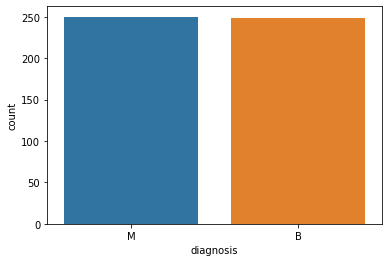

In [13]:
sns.countplot(df_upsampled.diagnosis)
B,M=df_upsampled.diagnosis.value_counts()
print("No. of Benign:", B)
print("No. of Malignant:", M)

In [14]:
new_x,new_y=df_upsampled.drop("diagnosis",axis=1),df_upsampled.diagnosis

In [15]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.3, random_state=42)

In [16]:
new_x_test.shape

(150, 16)

#### Classification using XGBoost (minimal feature selection)

In [17]:
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

C:\Users\Raghu\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is:  0.9333333333333333


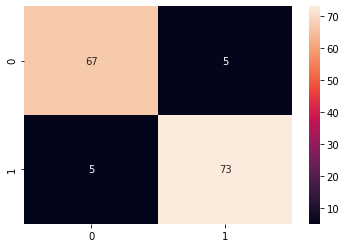

In [18]:
clf_rf = xgb.XGBClassifier(random_state=43)      
clr_rf = clf_rf.fit(new_x_train,new_y_train)

ac = accuracy_score(new_y_test,clf_rf.predict(new_x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(new_y_test,clf_rf.predict(new_x_test))
sns.heatmap(cm,annot=True,fmt="d");

#### Univariate Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_feature = SelectKBest(chi2, k=10).fit(new_x_train, new_y_train)

print('Score list:', select_feature.scores_)
print('Feature list:', new_x_train.columns)

Score list: [5.52694186e+01 2.89393470e+04 8.66078324e-02 9.57090604e+00
 1.84612633e-01 9.52353258e-04 2.83251886e-01 4.71780784e+03
 9.44816921e-04 6.14921234e-01 8.33533593e-03 2.34030245e-03
 2.08934555e-01 1.90991380e+01 8.83339809e-01 8.39662831e-02]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [20]:
x_train_2 = select_feature.transform(new_x_train) #selects only top 10 features we specified above
x_test_2 = select_feature.transform(new_x_test)

[17:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is:  0.9466666666666667


C:\Users\Raghu\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


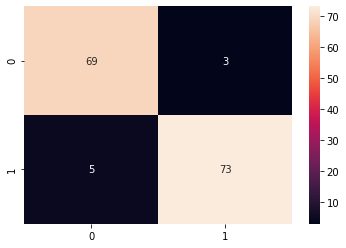

In [21]:
clf_rf_2 = xgb.XGBClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,new_y_train)

ac_2 = accuracy_score(new_y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(new_y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d");